### Logistic Regression Task

- 기계 센서 데이터를 통해 고장 여부를 예측하는 분류기를 모델화한다.

In [1]:
import pandas as pd

# 데이터 세트 호출
m_df = pd.read_csv('./datasets/machine.csv')
m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9810,1604,29.5,14,0,0,0,0,0
9811,1632,31.8,17,0,0,0,0,0
9812,1645,33.4,22,0,0,0,0,0
9813,1408,48.5,25,0,0,0,0,0


#### 📊 데이터 탐색

In [2]:
# 데이터 정보 확인
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


#### 📊 전처리

In [3]:
# 중복행 확인
m_df.duplicated().sum()

6

In [4]:
# 중복행 제거
pre_m_df = m_df.drop_duplicates()
# 중복행 제거 확인
pre_m_df.duplicated().sum()

0

In [5]:
# 타겟 데이터 비중 확인
pre_m_df['Machine failure'].value_counts()

Machine failure
0    9523
1     286
Name: count, dtype: int64

In [6]:
# under sampling
good_df = pre_m_df[pre_m_df['Machine failure'] == 0].sample(286, random_state=124) 
bad_df = pre_m_df[pre_m_df['Machine failure'] == 1]
pre_m_df = pd.concat([good_df, bad_df]).reset_index(drop=True)
pre_m_df

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1527,45.3,8,0,0,0,0,0
1,1524,40.4,131,0,0,0,0,0
2,1594,35.5,13,0,0,0,0,0
3,1671,31.8,108,0,0,0,0,0
4,1356,48.3,36,0,0,0,0,0
...,...,...,...,...,...,...,...,...
567,1352,48.9,238,0,0,0,1,1
568,1294,66.7,12,0,0,1,0,1
569,1360,60.9,187,0,0,0,1,1
570,1337,56.1,206,0,0,0,1,1


array([[<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>],
       [<Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'Machine failure'}>, <Axes: >]],
      dtype=object)

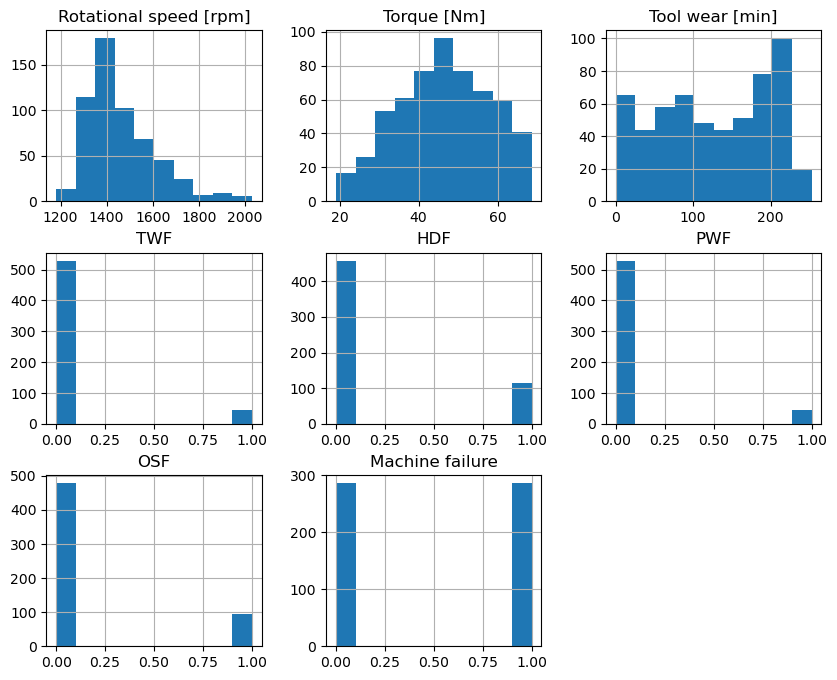

In [7]:
# 데이터 분포 확인
pre_m_df.hist(figsize=(10, 8))

In [8]:
from statsmodels.api import OLS

# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# OLS 확인
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Machine failure   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              974.9
Date:                Sun, 26 May 2024   Prob (F-statistic):                   1.25e-310
Time:                        23:52:06   Log-Likelihood:                          121.91
No. Observations:                 572   AIC:                                     -229.8
Df Residuals:                     565   BIC:                                     -199.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [10]:
# vif 확인
get_vif(features)

,vif_score,feature
0,17.292064,Rotational speed [rpm]
1,20.942339,Torque [Nm]
2,7.262241,Tool wear [min]
3,1.424932,TWF
4,1.822451,HDF
5,1.543529,PWF
6,2.504618,OSF


In [11]:
# 상관관계 확인
pre_m_df.corr()['Machine failure'].sort_values(ascending=False)[1:]

Torque [Nm]               0.586769
HDF                       0.501638
OSF                       0.443455
Tool wear [min]           0.335155
TWF                       0.288675
PWF                       0.288675
Rotational speed [rpm]   -0.510421
Name: Machine failure, dtype: float64

<Axes: >

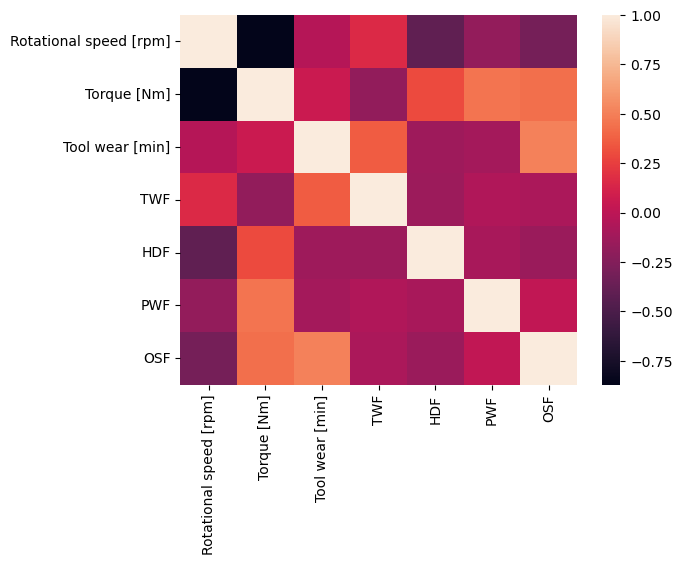

In [12]:
import seaborn as sns

# 히트맵을 통한 독립변수 간 상관관계 확인
sns.heatmap(features.corr())

In [13]:
# 불필요한 컬럼ㄹ 제거
pre_m_df = pre_m_df.drop(labels=['Tool wear [min]'], axis=1)
pre_m_df

,Rotational speed [rpm],Torque [Nm],TWF,HDF,PWF,OSF,Machine failure
0,1527,45.3,0,0,0,0,0
1,1524,40.4,0,0,0,0,0
2,1594,35.5,0,0,0,0,0
3,1671,31.8,0,0,0,0,0
4,1356,48.3,0,0,0,0,0
...,...,...,...,...,...,...,...
567,1352,48.9,0,0,0,1,1
568,1294,66.7,0,0,1,0,1
569,1360,60.9,0,0,0,1,1
570,1337,56.1,0,0,0,1,1


In [14]:
from statsmodels.api import OLS

# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# OLS 확인
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Machine failure   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              1135.
Date:                Sun, 26 May 2024   Prob (F-statistic):                   8.84e-312
Time:                        23:52:06   Log-Likelihood:                          120.99
No. Observations:                 572   AIC:                                     -230.0
Df Residuals:                     566   BIC:                                     -203.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [15]:
# vif 확인
get_vif(features)

,vif_score,feature
0,14.333509,Rotational speed [rpm]
1,20.921710,Torque [Nm]
2,1.129951,TWF
3,1.817016,HDF
4,1.531894,PWF
5,1.804485,OSF


In [16]:
# 상관관계 확인
pre_m_df.corr()['Machine failure'].sort_values(ascending=False)[1:]

Torque [Nm]               0.586769
HDF                       0.501638
OSF                       0.443455
TWF                       0.288675
PWF                       0.288675
Rotational speed [rpm]   -0.510421
Name: Machine failure, dtype: float64

In [17]:
# 필요한 데이터만 추출
pre_m_df = pre_m_df.loc[:, ['Torque [Nm]', 'HDF', 'OSF', 'Rotational speed [rpm]', 'Machine failure']]
pre_m_df

,Torque [Nm],HDF,OSF,Rotational speed [rpm],Machine failure
0,45.3,0,0,1527,0
1,40.4,0,0,1524,0
2,35.5,0,0,1594,0
3,31.8,0,0,1671,0
4,48.3,0,0,1356,0
...,...,...,...,...,...
567,48.9,0,1,1352,1
568,66.7,0,0,1294,1
569,60.9,0,1,1360,1
570,56.1,0,1,1337,1


In [18]:
from statsmodels.api import OLS

# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# OLS 확인
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:        Machine failure   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              525.3
Date:                Sun, 26 May 2024   Prob (F-statistic):                   3.08e-189
Time:                        23:52:06   Log-Likelihood:                         -170.82
No. Observations:                 572   AIC:                                      349.6
Df Residuals:                     568   BIC:                                      367.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [19]:
# vif 확인
get_vif(features)

,vif_score,feature
0,14.681669,Torque [Nm]
1,1.572662,HDF
2,1.634984,OSF
3,11.131173,Rotational speed [rpm]


In [20]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# 난수(랜덤값) 생성
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 데이터 프레임을 텐서로 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 기울기(W)와 편향(b) 초기화
# W는 (4, 1) 크기의 0으로 채워진 텐서로 초기화, 경사도 계산:Ture
# b는 1차원 0으로 채워진 텐서로 초기화, 경사도 계산:Ture
W = torch.zeros((4, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 최적화 알고리즘을 통해 가중치와 편향 업데이트
# 학습률 지정 = lr
optimizer = SGD([W, b], lr=0.000004)

# 반복 횟수
epochs = 10000

for epoch in range(1, epochs + 1):
    # 가설 선언
    # H = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))
    H = torch.sigmoid(X_train.matmul(W) + b)

    # 손실 함수 선언
    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    loss= binary_cross_entropy(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100 epoch 단위로 로그 출력
    if epoch % 1000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), b.item(), loss.item()))

1000/10000: W1: 0.0164, W2: 0.0004, W3: 0.0003, b: 0.0001, loss: 0.6901
2000/10000: W1: 0.0295, W2: 0.0008, W3: 0.0006, b: 0.0002, loss: 0.5927
3000/10000: W1: 0.0398, W2: 0.0011, W3: 0.0009, b: 0.0002, loss: 0.5576
4000/10000: W1: 0.0483, W2: 0.0015, W3: 0.0011, b: 0.0003, loss: 0.5393
5000/10000: W1: 0.0555, W2: 0.0018, W3: 0.0014, b: 0.0003, loss: 0.5264
6000/10000: W1: 0.0616, W2: 0.0021, W3: 0.0016, b: 0.0003, loss: 0.5171
7000/10000: W1: 0.0668, W2: 0.0024, W3: 0.0018, b: 0.0004, loss: 0.5101
8000/10000: W1: 0.0714, W2: 0.0026, W3: 0.0020, b: 0.0004, loss: 0.5049
9000/10000: W1: 0.0754, W2: 0.0029, W3: 0.0022, b: 0.0004, loss: 0.5008
10000/10000: W1: 0.0789, W2: 0.0032, W3: 0.0024, b: 0.0004, loss: 0.4976


In [21]:
# 예측값 출력
print(H)
# 예측값을 기준으로한 이진분류
print(H >= 0.5)
# 가중치, 편향 출력
print(W, b)

tensor([[0.9041],
        [0.3520],
        [0.6913],
        [0.3927],
        [0.6604],
        [0.4113],
        [0.3399],
        [0.5022],
        [0.8025],
        [0.6489],
        [0.1682],
        [0.0288],
        [0.8213],
        [0.0599],
        [0.7599],
        [0.8646],
        [0.0392],
        [0.1650],
        [0.5434],
        [0.3498],
        [0.8209],
        [0.2553],
        [0.4687],
        [0.6986],
        [0.1856],
        [0.6016],
        [0.8752],
        [0.3358],
        [0.0976],
        [0.5776],
        [0.1982],
        [0.6395],
        [0.6415],
        [0.6080],
        [0.5291],
        [0.3295],
        [0.4518],
        [0.4109],
        [0.2820],
        [0.7770],
        [0.2187],
        [0.4816],
        [0.3590],
        [0.5448],
        [0.4984],
        [0.3630],
        [0.5114],
        [0.7362],
        [0.6598],
        [0.6976],
        [0.5693],
        [0.3746],
        [0.7150],
        [0.3721],
        [0.4316],
        [0

In [22]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [23]:
# 평가
# 양성에 속할 확률 계산
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

오차 행렬
[[50 10]
 [ 7 48]]
정확도: 0.8522, 정밀도: 0.8276, 재현율: 0.8727, F1:0.8496, AUC:0.8530
###########################################################################


#### 📊 sigmoid

In [24]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD

# 난수(랜덤값) 생성
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 데이터 프레임 텐서로 변환
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 로지스틱 회귀 모델 정의
logistic_r = nn.Sequential(
   nn.Linear(4, 1), # 4개 input을 통해 결과 출력
   nn.Sigmoid() # 출력시 시그모이드 함수를 통과한다.
)

# 최적화 알고리즘을 통해 가중치와 편향 업데이트
# 학습률 지정 = lr
optimizer = SGD(logistic_r.parameters(), lr=4)

# 반복 횟수
epochs = 1000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = logistic_r(X_train)

    # 손실 함수 선언
    loss= binary_cross_entropy(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs},', end=' ')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())} Loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0 Loss: 27.2991
Epoch: 200/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0 Loss: 27.2946
Epoch: 300/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0259, b: 0.0 Loss: 27.2901
Epoch: 400/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2854
Epoch: 500/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2808
Epoch: 600/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2761
Epoch: 700/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2714
Epoch: 800/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2666
Epoch: 900/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2618
Epoch: 1000/1000, W1: -0.3474, W2: 0.1311, W3: 0.3407, W4: -0.0258, b: 0.0 Loss: 27.2569


In [25]:
# 평가
# 양성에 속할 확률 계산
get_evaluation(y_test.detach().numpy(), logistic_r(X_test) >= 0.5)

오차 행렬
[[60  0]
 [55  0]]
정확도: 0.5217, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000, AUC:0.5000
###########################################################################


C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 📊 LogisticRegression
LogisticRegression는 로지스틱 회귀 모델을 구현하며, 내부적으로 시그모이드 함수를 사용 (예측 시 시그모이드 함수가 적용된 예측값이 반환)  
모델의 출력을 0과 1 사이의 확률 값으로 변환

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 로지스틱 회귀 모델 객체 생성
# solver = 로지스틱 회귀 모델의 최적화에 사용되는 알고리즘 지정 (liblinear = 작은 데이터셋에 적합)
# penalty = 규제 유형을 지정 (l2 = 릿지(Ridge) 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
# 학습
lg.fit(X_train, y_train)
# 예측
prediction = lg.predict(X_test)

오차 행렬
[[57  1]
 [14 43]]
정확도: 0.8696, 정밀도: 0.9773, 재현율: 0.7544, F1:0.8515, AUC:0.8686
###########################################################################


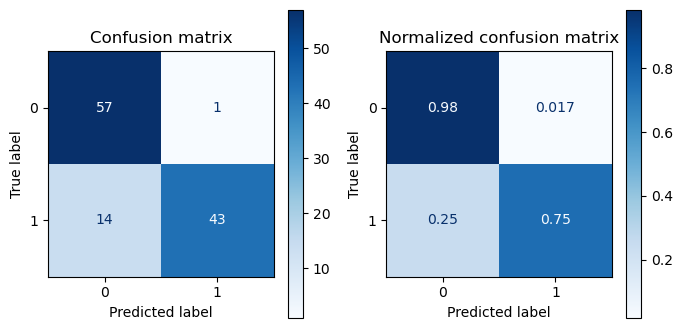

In [27]:
# 평가
get_evaluation(y_test, prediction, lg, X_test)

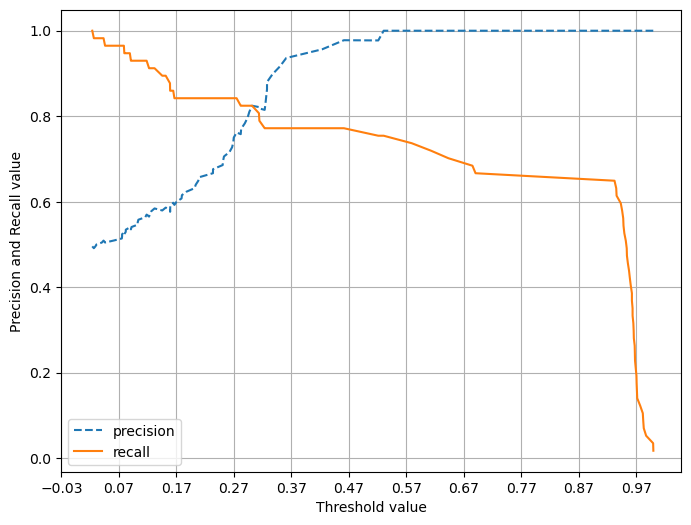

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

In [29]:
_, _, thresholds = precision_recall_curve(y_test, lg.predict_proba(X_test)[:, 1])
thresholds

array([0.02369545, 0.02643618, 0.02913401, 0.03095308, 0.04035467,
       0.04328531, 0.04593603, 0.06114097, 0.07509506, 0.07551487,
       0.07555603, 0.078661  , 0.07941917, 0.08186686, 0.08203283,
       0.08902593, 0.09093108, 0.09195627, 0.10268765, 0.10272307,
       0.10389942, 0.11593077, 0.11819794, 0.12243872, 0.12398518,
       0.12633899, 0.13197342, 0.14540193, 0.15139915, 0.158804  ,
       0.1590715 , 0.15917093, 0.1593325 , 0.16448758, 0.16653552,
       0.17026459, 0.17893281, 0.17961216, 0.18737524, 0.20144032,
       0.20371968, 0.20787475, 0.21018222, 0.23356806, 0.23367818,
       0.25043796, 0.25118518, 0.25274212, 0.26237577, 0.26681847,
       0.26885088, 0.26973927, 0.27465878, 0.2818662 , 0.28259909,
       0.2889767 , 0.29381277, 0.29683451, 0.30152494, 0.31351515,
       0.31428326, 0.3234931 , 0.32493193, 0.32618818, 0.32755981,
       0.32761062, 0.33692745, 0.35009342, 0.36099683, 0.4234563 ,
       0.46130517, 0.52104656, 0.53043627, 0.57928555, 0.61289

In [30]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [31]:
# 임계값 확인
get_evaluation_by_thresholds(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.02369544729060229
오차 행렬
[[ 0 58]
 [ 1 56]]
정확도: 0.4870, 정밀도: 0.4912, 재현율: 0.9825, F1:0.6550, AUC:0.4912
###########################################################################
임곗값: 0.026436177854945828
오차 행렬
[[ 1 57]
 [ 1 56]]
정확도: 0.4957, 정밀도: 0.4956, 재현율: 0.9825, F1:0.6588, AUC:0.4998
###########################################################################
임곗값: 0.029134007932142478
오차 행렬
[[ 2 56]
 [ 1 56]]
정확도: 0.5043, 정밀도: 0.5000, 재현율: 0.9825, F1:0.6627, AUC:0.5085
###########################################################################
임곗값: 0.030953076115280073
오차 행렬
[[ 3 55]
 [ 1 56]]
정확도: 0.5130, 정밀도: 0.5045, 재현율: 0.9825, F1:0.6667, AUC:0.5171
###########################################################################
임곗값: 0.04035467481508473
오차 행렬
[[ 4 54]
 [ 1 56]]
정확도: 0.5217, 정밀도: 0.5091, 재현율: 0.9825, F1:0.6707, AUC:0.5257
###########################################################################
임곗값: 0.04328531102553498
오차 행렬
[[ 4 54]
 [ 2 55]]
정확도: 0.5130,

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[47 11]
 [10 47]]
정확도: 0.8174, 정밀도: 0.8103, 재현율: 0.8246, F1: 0.8174, ROC-AUC: 0.8175
################################################################################


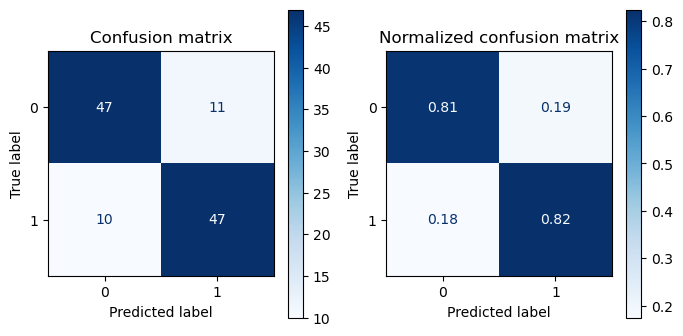

In [33]:
# 임계값 조정
binarizer = Binarizer(threshold=0.2968)
# 임계값 조정하여 예측
custom_prediction = binarizer.fit_transform(lg.predict_proba(X_test)[:, 1].reshape(-1, 1))
# 평가
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

In [34]:
import pickle
import joblib

# pkl(피클) 파일로 내보내기
# 생성한 파일을 통해 학습시킨 모델을 사용할 수 있음
joblib.dump(lg, './machine.pkl')

['./machine.pkl']